# Github Repo Classification


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

os.chdir('/Users/mbornstein/Documents/projects/ml/github_informaticup/GithubRepoClassification')

from metrics.githubMetrics import GithubMetrics, metricCollection
from data.given_repos import given_repos

## Data Aggregation

In [31]:
def get_repo_links(amount=100):
    repo_links = open('data/repoURLs.txt', 'r').readlines()[:amount]
    return [link.strip() for link in repo_links]

def aggregate_data(data_size=100):
    given_repo_links, _ = given_repos
    repo_links = get_repo_links(data_size) + given_repo_links
    metric_list = list(metricCollection.keys())

    data = []
    for link in repo_links:
        github_metrics = GithubMetrics(link)
        data.append([link] + [github_metrics.get(m) for m in metric_list])

    return pd.DataFrame(data=data, columns=['repo'] + metric_list)

In [32]:
data = aggregate_data(data_size=0)
data

,repo,repo_size,open_issues,forks_count,up_to_dateness,file_count,watcher_count
0,https://github.com/briantemple/homeworkr,226,0,2,1.513372e+08,0,6
1,https://github.com/spring-projects/spring-boot,57302,621,8257,7.878037e+03,0,8560
2,https://github.com/facebook/react,146983,611,9723,4.104448e+03,0,54533
3,https://github.com/nodegit/nodegit,29623,142,351,8.432109e+05,0,2267
4,https://github.com/scipy/scipy,80666,927,1572,1.343390e+04,2330,2715
5,https://github.com/spez/RottenTomatoes,2064,1,0,7.739588e+07,155,0
6,https://github.com/m2mtech/calculator-2015,518,1,27,1.340873e+07,47,70
7,https://github.com/bcaffo/751and2,16773,2,24,3.059615e+07,199,7
8,https://github.com/HPI-SWA-Teaching/SWT16-Proj...,328,0,5,3.145557e+06,519,0
9,https://github.com/uwhpsc-2016/example-python-...,7,4,7,1.950230e+07,62,0


## Visualizations

we want to compare stuff

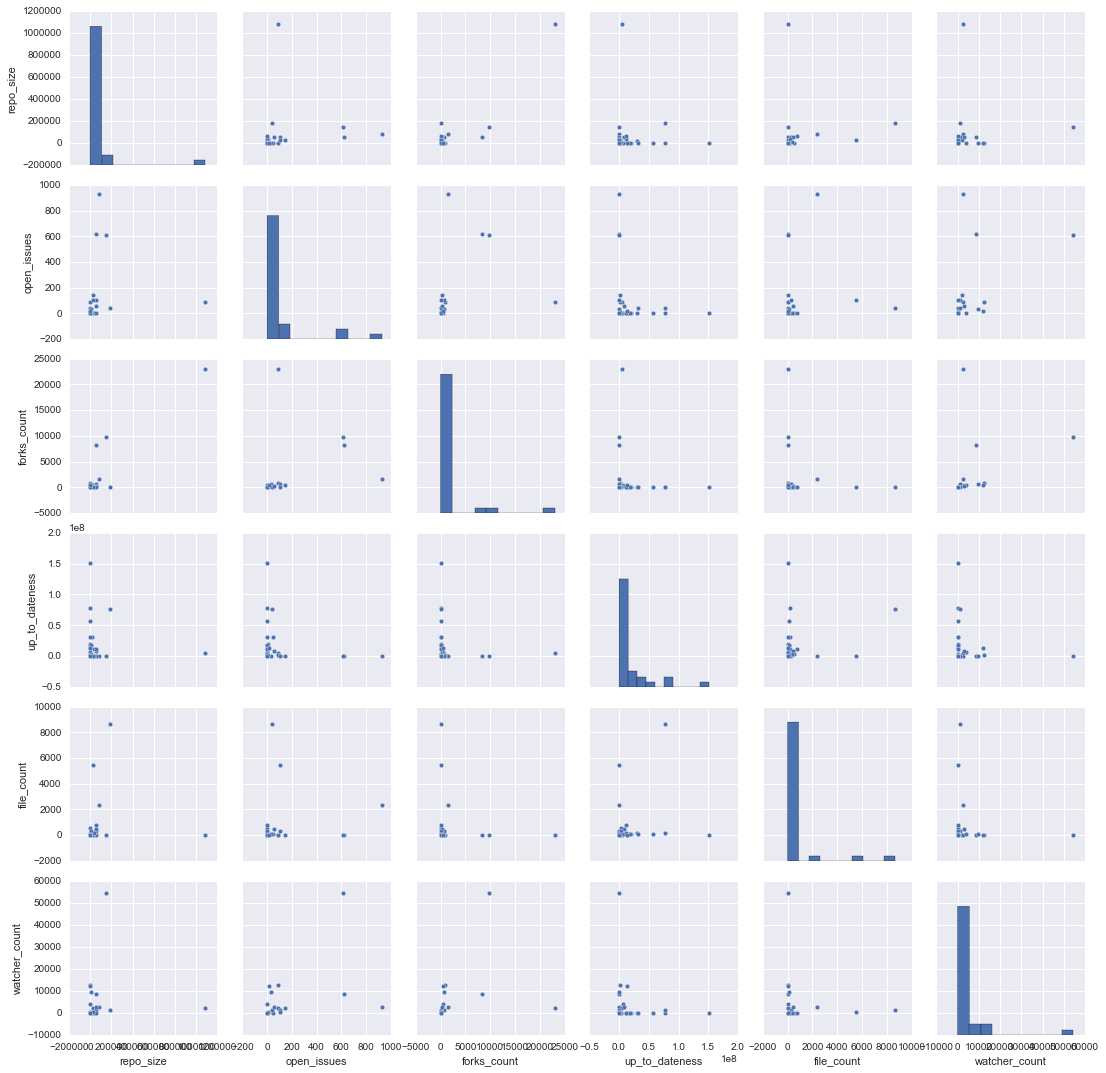

In [35]:
sbn.pairplot(data)

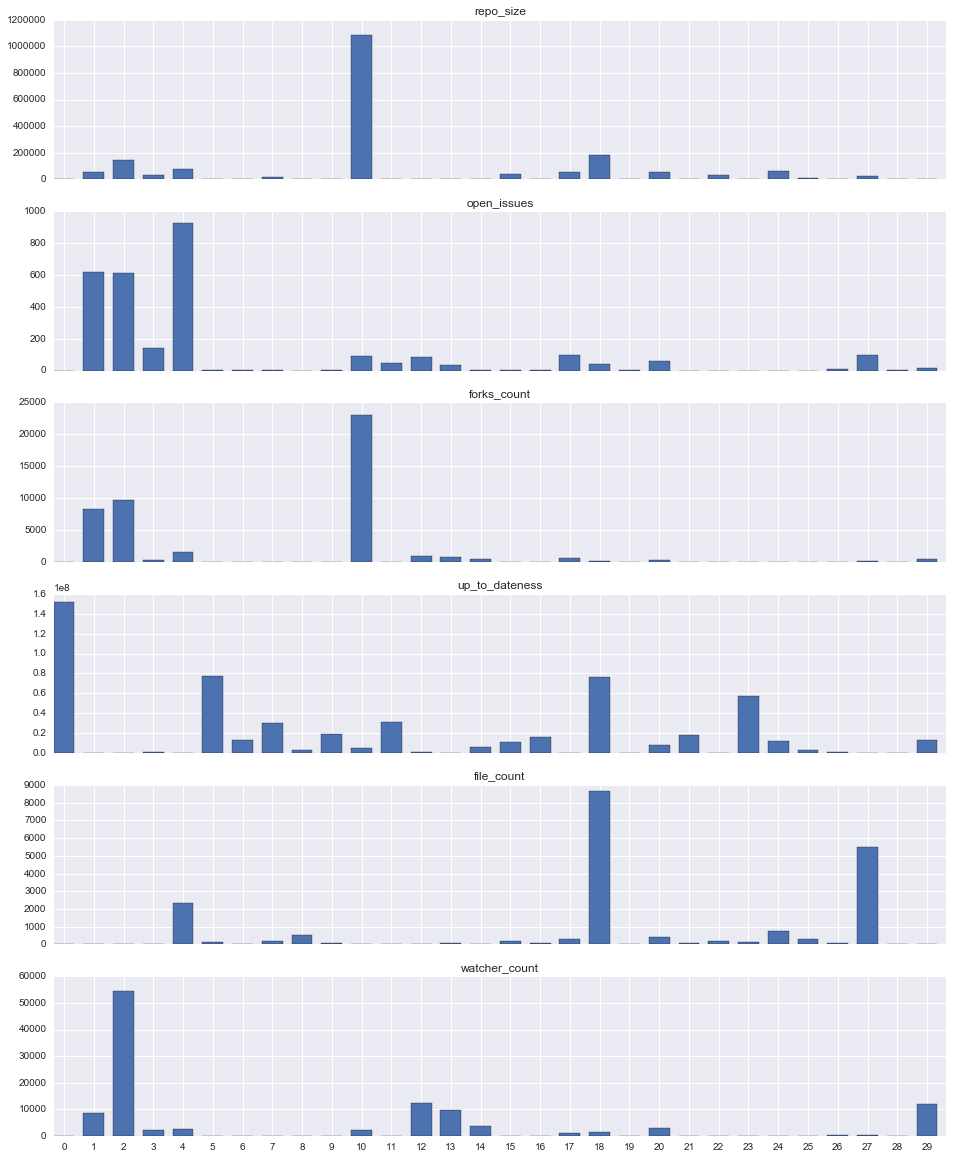

In [75]:
#fig = plt.figure(figsize=(16,8))
f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

index = np.arange(len(data))
for i, metric in enumerate(metricCollection):
    ax = axarr[i]
    ax.bar(index,
        data[metric],
        0.7, # barwdith
        label=metric
    )
    ax.set_title(metric)

plt.xticks(index + 0.35, index)
None

## TSNE

In [76]:
import sklearn

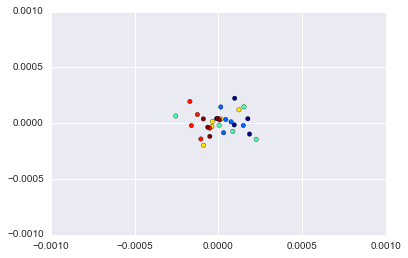

In [93]:
X = data[['repo_size', 'open_issues', 'forks_count', 'up_to_dateness', 'file_count', 'watcher_count']]
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y, c=[[0]*5, [1]*5, [2]*5, [3]*5, [4]*5, [5]*5], cmap=plt.cm.get_cmap("jet", 10))
#plt.clim(-0.5, 9.5)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)
None